In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
# conda install seaborn

In [2]:
df = pd.read_excel('results/all_result.xlsx')
df.columns

Index(['Unnamed: 0', 'identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen', 'alpha_x',
       'upper', 'sequence_length_x', 'explainer', 'ID', 'RMSE_val',
       'RMSE_test', 'R2_test', 'Score_test', 'alpha_y', 'rul_piecewise',
       'sequence_length_y'],
      dtype='object')

In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df.columns = ['identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen', 'alpha',
       'rul_early', 'TW', 'explainer', 'ID', 'RMSE_val',
       'RMSE', 'R2', 'S_score', 'alpha_y', 'rul_piecewise',
       'sequence_length_y']
col_to_drop = ['rul_piecewise', 'sequence_length_y', 'alpha_y']
df.head(5)

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha,rul_early,TW,explainer,ID,RMSE_val,RMSE,R2,S_score,alpha_y,rul_piecewise,sequence_length_y
0,1,1,1.0,0.192458,0.809572,0.234775,0.714386,0.115556,0.1,100,20,lime,0.1_100_20,10.461751,11.406910,0.88250,802.040449,0.1,100,20
1,1,1,0.9,0.192833,0.808804,0.235678,0.808205,0.362796,0.1,100,20,shap,0.1_100_20,10.461751,11.406910,0.88250,802.040449,0.1,100,20
2,1,1,1.0,0.411627,0.436281,0.110497,0.536943,NaN,0.1,100,20,saliency,0.1_100_20,10.461751,11.406910,0.88250,802.040449,0.1,100,20
3,1,1,1.0,0.240693,0.758026,0.281548,0.755209,0.052903,0.1,100,20,l2x,0.1_100_20,10.461751,11.406910,0.88250,802.040449,0.1,100,20
4,1,1,1.0,0.172190,0.845714,0.203024,0.620965,0.074552,0.1,120,20,lime,0.1_120_20,10.198321,12.376318,0.85011,1719.977717,0.1,120,20


In [5]:
df = df.drop(col_to_drop, axis = 1)
df.head(4)

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha,rul_early,TW,explainer,ID,RMSE_val,RMSE,R2,S_score
0,1,1,1.0,0.192458,0.809572,0.234775,0.714386,0.115556,0.1,100,20,lime,0.1_100_20,10.461751,11.40691,0.8825,802.040449
1,1,1,0.9,0.192833,0.808804,0.235678,0.808205,0.362796,0.1,100,20,shap,0.1_100_20,10.461751,11.40691,0.8825,802.040449
2,1,1,1.0,0.411627,0.436281,0.110497,0.536943,NaN,0.1,100,20,saliency,0.1_100_20,10.461751,11.40691,0.8825,802.040449
3,1,1,1.0,0.240693,0.758026,0.281548,0.755209,0.052903,0.1,100,20,l2x,0.1_100_20,10.461751,11.40691,0.8825,802.040449


##### Analyse des résultats

In [34]:
# Select parameters that give the best performances
df.sort_values("S_score").head(5)

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha,rul_early,TW,explainer,ID,RMSE_val,RMSE,R2,S_score
380,1,1,1.0,0.168983,0.831608,0.204215,0.646197,0.078891,0.5,100,40,lime,0.5_100_40,8.837831,10.140252,0.902844,506.469249
382,1,1,0.9,0.101302,0.949925,0.099813,0.552691,NaN,0.5,100,40,saliency,0.5_100_40,8.837831,10.140252,0.902844,506.469249
383,1,1,1.0,0.413204,0.584382,0.373299,0.574276,0.033596,0.5,100,40,l2x,0.5_100_40,8.837831,10.140252,0.902844,506.469249
381,1,1,1.0,0.168399,0.831441,0.205010,0.681174,0.405403,0.5,100,40,shap,0.5_100_40,8.837831,10.140252,0.902844,506.469249
467,1,1,1.0,0.193506,0.807437,0.232891,0.679784,0.034470,0.5,120,60,l2x,0.5_120_60,9.305602,10.635534,0.895333,553.578222


In [37]:
tab_optimal_model = df[['RMSE', 'R2', 'S_score', 'alpha', 'TW', 'rul_early']]
tab_optimal_model.sort_values('RMSE').head(6)

,RMSE,R2,S_score,alpha,TW,rul_early
403,9.839594,0.882118,731.429247,0.1,60,100
401,9.839594,0.882118,731.429247,0.1,60,100
400,9.839594,0.882118,731.429247,0.1,60,100
402,9.839594,0.882118,731.429247,0.1,60,100
383,10.140252,0.902844,506.469249,0.5,40,100
382,10.140252,0.902844,506.469249,0.5,40,100


In [38]:
tab_optimal_model.shape

(480, 6)

parameters that give best performance : alpha=05 ; rul_early=100 ; tw=40

On va analyser lorsque deux de ce paramètres sont fixes, le comportement de la performance du modèles selon le choix du troisisème paramètres.
On évaluera ensuite le comprtement de la qualité des explications fournies par les modèles XAI.

In [7]:
# alpha et rul_early
df_tmp=df.query( 'alpha==0.5 & rul_early==100 & explainer!="saliency"')
df_no_s = df.query( 'explainer!="saliency"')

In [8]:
perf = ['RMSE', 'S_score']
param = ['TW', 'rul_early', 'alpha']
param_values = {'alpha' : 0.5, 'rul_early':100, 'TW':40}
perf_parm = []
for p in perf:
    for a in param:
        perf_parm.append((p,a))
perf_parm

[('RMSE', 'TW'),
 ('RMSE', 'rul_early'),
 ('RMSE', 'alpha'),
 ('S_score', 'TW'),
 ('S_score', 'rul_early'),
 ('S_score', 'alpha')]

In [9]:
perf_parm  = [('RMSE', 'TW'), ('S_score', 'TW'), 
              ('RMSE', 'rul_early'), ('S_score', 'rul_early'),
              ('RMSE', 'alpha'), ('S_score', 'alpha')
             ]

In [10]:
list_dftmp = {'TW' : df.query( 'alpha==0.5 & rul_early==100 & explainer!="saliency"'),
             'alpha' : df.query( 'TW==40 & rul_early==100 & explainer!="saliency"'),
             'rul_early' : df.query( 'alpha==0.5 & TW==40 & explainer!="saliency"')}

<Axes: xlabel='rul_early', ylabel='RMSE'>

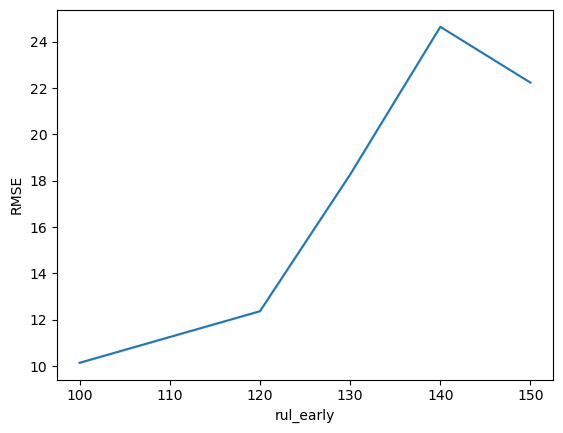

In [11]:
ii = perf_parm[2]
sns.lineplot(x=ii[1], y=ii[0], data=list_dftmp[ii[1]])
# perf_parm[2]

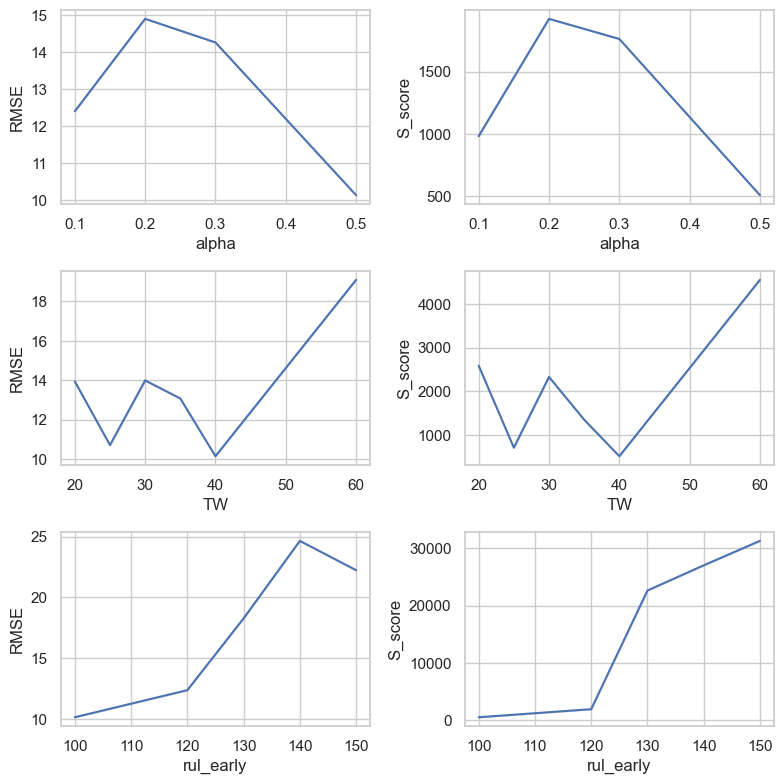

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
i=1
for ii in perf_parm :
    plt.subplot(3,2, i)
    sns.lineplot(x=ii[1], y=ii[0], data=list_dftmp[ii[1]])
#     plt.xlabel('Lamine')
    i+=1
plt.tight_layout()
plt.savefig('results/all_performance.png')
plt.show()

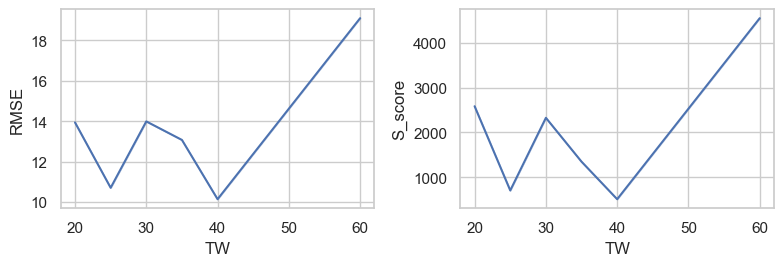

In [25]:
# Utilisez seaborn pour créer des box plots
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
# Box plot pour Quantitatif1 en fonction de la catégorie
for i, col in enumerate(perf):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x='TW', y=col, data=df_tmp)
#     plt.subplot(3, 2, i+2)
#     sns.lineplot(x='rul_early', y=col, data=df_tmp)
#     plt.subplot(3, 2, i+3)
#     sns.lineplot(x='alpha', y=col, data=df_tmp)
    
# plt.title('Performances en e TW lorsque alpha et rul_early sont fixés (TW=0.5 ; rul_early=100)')
plt.tight_layout()
plt.savefig('results/performance_TW.png')
plt.show()

In [26]:
df_best.columns

Index(['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'alpha', 'rul_early', 'TW',
       'explainer', 'ID', 'RMSE_val', 'RMSE', 'R2', 'S_score'],
      dtype='object')

In [29]:
df_best = df.query('alpha==0.5 & TW == 40 & rul_early == 100 & explainer!="saliency"')
columns_metrics = ['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'explainer']
df_best[columns_metrics]

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,explainer
380,1,1,1.0,0.168983,0.831608,0.204215,0.646197,0.078891,lime
381,1,1,1.0,0.168399,0.831441,0.205010,0.681174,0.405403,shap
383,1,1,1.0,0.413204,0.584382,0.373299,0.574276,0.033596,l2x


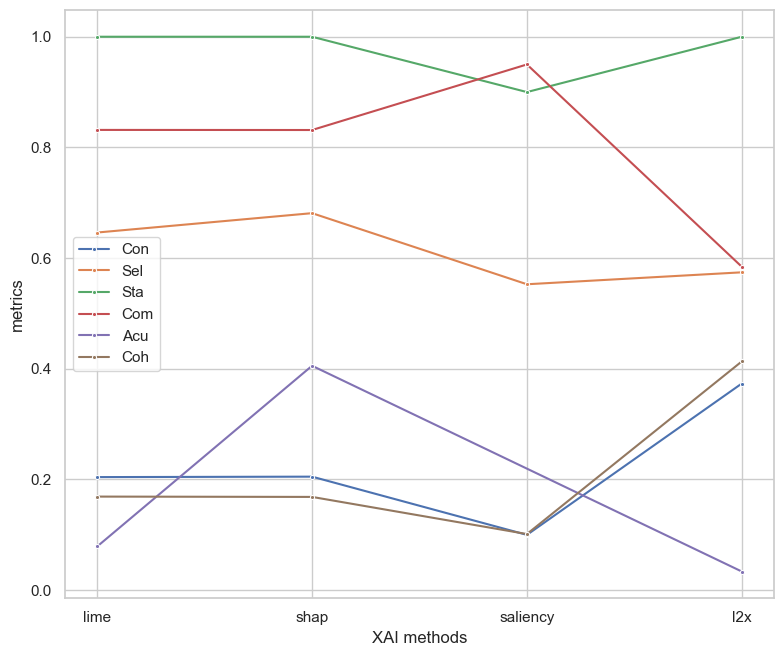

In [22]:
# Create boxplots for each combination
plt.figure(figsize=(8, 7))
sns.set(style="whitegrid")

#sns.lineplot(x='alpha_x', y='R2_test', data=df_best)
sns.lineplot(x = 'explainer', y='congruence', data=df_best, label='Con', marker='.')
sns.lineplot(x = 'explainer', y='selectivity', data=df_best, label='Sel', marker='.')
sns.lineplot(x = 'explainer', y='stability', data=df_best, label='Sta', marker='.')
sns.lineplot(x = 'explainer', y='completness', data=df_best, label='Com', marker='.')
sns.lineplot(x = 'explainer', y='accumen', data=df_best, label = 'Acu', marker='.')
sns.lineplot(x = 'explainer', y='coherence', data=df_best, label = 'Coh', marker='.')
plt.xlabel('XAI methods')
plt.ylabel('metrics')
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.legend(loc='lower left')
plt.savefig('results/metric_best.png')
plt.show()

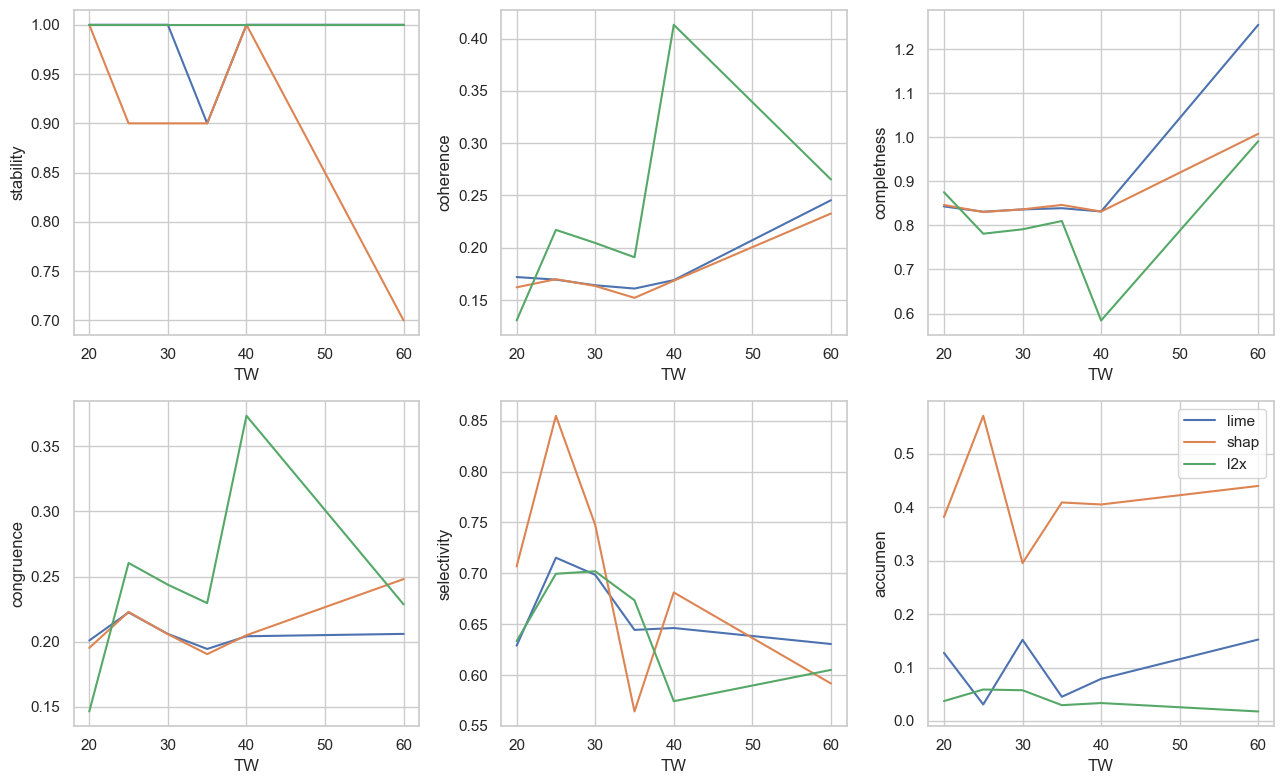

In [10]:
# Définissez la première colonne quantitative comme axe des abscisses
plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")

# Créez une seule légende en dehors de la boucle
for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i - 1)
    sns.lineplot(x='TW', y=df.columns[i], hue='explainer', data=df_tmp)

#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('results/metric_TW_paramfixe.png')
plt.show()

L'nalyse de la qualité des explications en fonction du time window montre, c'est uniquement la méthode L2X qui présente des pics lorsque TW est optimale. Ces pics sont observés à travers les métriques cohérence, completness, congruence et selectivity. Par ailleurs, pour LIME et SHAP, dans certaines métriques, on peut voir qu'ils ont eu leur pire qualité d'explication en TW=60. Cependant, ils restent moins sensible aux variations de TW par rapport à L2X.

In [11]:
# TW et alpha
df_tmp=df.query('alpha==0.5 & TW==40 & explainer!="saliency"')

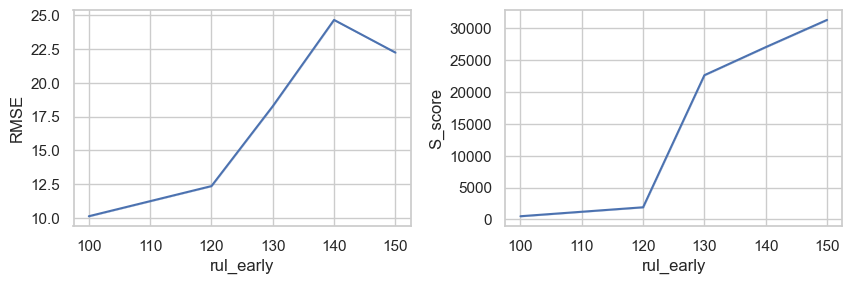

In [12]:
# Utilisez seaborn pour créer des box plots
plt.figure(figsize=(13, 3))
# Box plot pour Quantitatif1 en fonction de la catégorie
for i, col in enumerate(perf):
    plt.subplot(1, 3, i+1)
    sns.lineplot(x='rul_early', y=col, data=df_tmp)
# plt.title('Performances en e TW lorsque alpha et rul_early sont fixés (TW=0.5 ; rul_early=100)')
plt.tight_layout()
plt.savefig('results/performance_rul.png')
plt.show()

On note que lorsque TW et alpha sont fixés, les pires performances ont été obtenu lorsque rul_early vaut 140. 
La meileurs performances a été obtenues lorsque rul early vaut 100 : R2 90+; RMSE10-; S-Score = 400.

On évalue la qualité des explications fournies selons les trois approches : L2X, LIME et SHAPE dans les mêmes conditions.

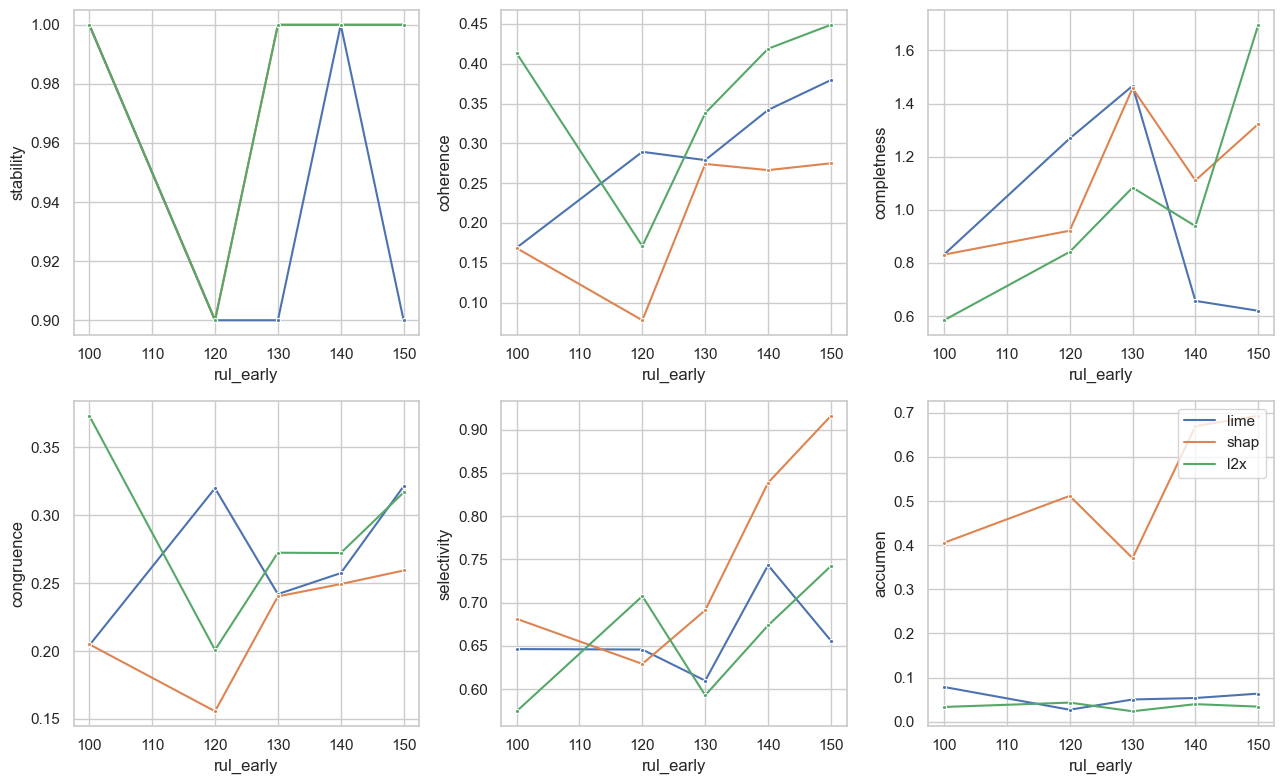

In [13]:
# Définissez la première colonne quantitative comme axe des abscisses
plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")

# Créez une seule légende en dehors de la boucle
for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i - 1)
    sns.lineplot(x='rul_early', y=df.columns[i], hue='explainer',marker =".", data=df_tmp)

#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('results/metric_rul_paramfixe.png')
plt.show()

Pour le rectified rul, la variation des métriques est plus forte. On note que les pics de ces métriques d'évaluation ne sont pas observées à la valuer 100 de rectfied RUL. Autrement dit, les meilleurs explications ne sont pas obtenues lorsque le rectifed rul est optimal. Ceci montre que la qualités des explications ne sont pas fortement liées à la performance u modèle.

In [14]:
# TW et rul_early
# alpha et rul_early
df_tmp=df.query( 'TW==40 & rul_early==100 & explainer!="saliency"')
# perf = ['R2', 'RMSE', 'S_score']

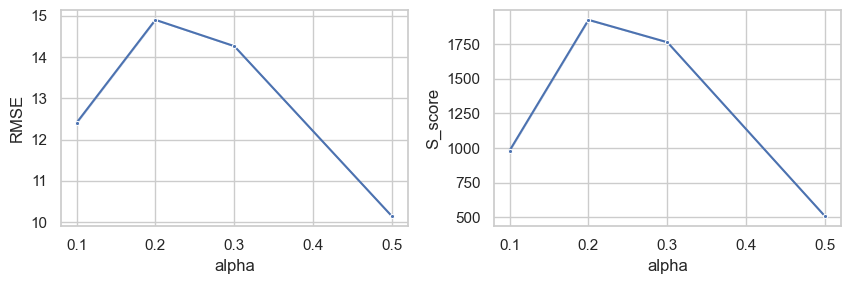

In [15]:
# Utilisez seaborn pour créer des box plots
plt.figure(figsize=(13, 3))
# Box plot pour Quantitatif1 en fonction de la catégorie
for i, col in enumerate(perf):
    plt.subplot(1, 3, i+1)
    sns.lineplot(x='alpha', y=col, marker=".", data=df_tmp)
# plt.title('Performances en e TW lorsque alpha et rul_early sont fixés (TW=0.5 ; rul_early=100)')
plt.tight_layout()
plt.savefig('results/performance_alpha.png')
plt.show()

On voit que selon selon RMSE et S_score, le meilleur modèle est obtenu lorsque alpha est 0.5

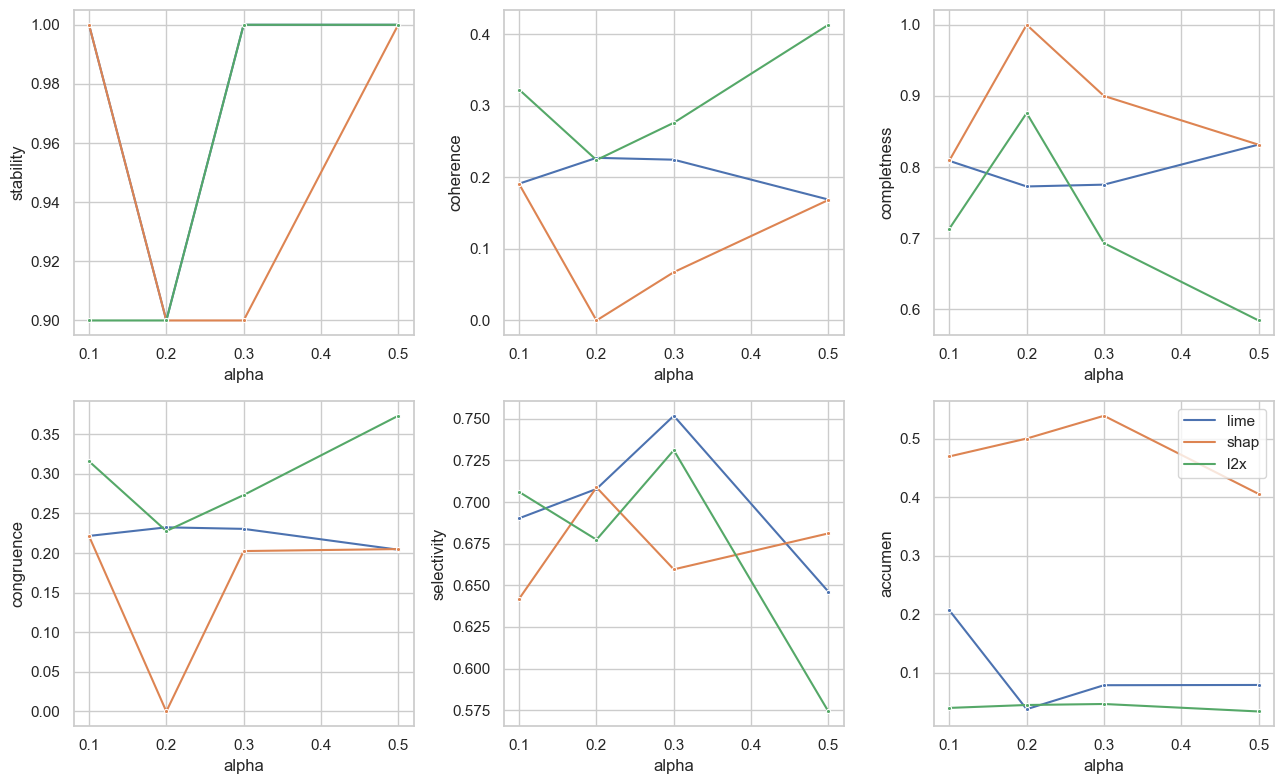

In [16]:
# Définissez la première colonne quantitative comme axe des abscisses
plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")

# Créez une seule légende en dehors de la boucle
for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i - 1)
    sns.lineplot(x='alpha', y=df.columns[i], hue='explainer', marker =".", data=df_tmp)

#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('results/metric_alpha_paramfixe.png')
plt.show()

L'analyse de ces résultats permet de noter que la sensibilité de la qualité des résultats selon les valuers de apha n'et pas la même pour les trois modèle XAI.

La qualité des explications fournies par le modèles L2X et SHAP suivent les performance du modèles lorsque alpha varie. Autrement dit, cette qualité est meileures lorsque alpha est optimal. En effet, mles résultats montre que les meilleures qualité des explications fournies par L2X ont été obtenues lorsque alpha =0.2 (selon coherence, completness, et congruence) ou alpha=0.3 (selon completness). On peut dire que celle ci est fortement liée à la performance du modèle quand alpha varie.

<Axes: xlabel='alpha', ylabel='stability'>

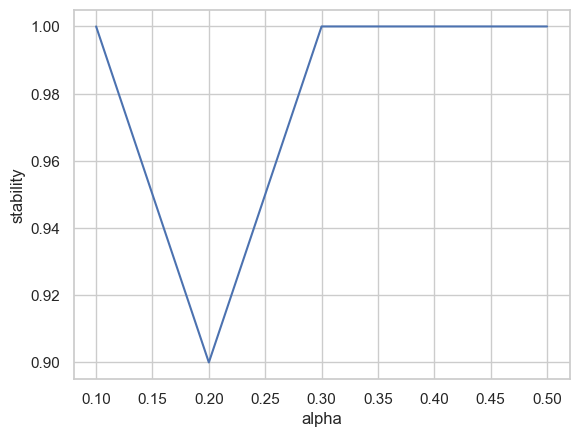

In [17]:
sns.lineplot(x='alpha', y = 'stability', data = df_tmp.query('explainer=="lime"'))

In [18]:
df.columns

Index(['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'alpha', 'rul_early', 'TW',
       'explainer', 'ID', 'RMSE_val', 'RMSE', 'R2', 'S_score'],
      dtype='object')

In [19]:
# Score de qualité d'explicaton
df_tmp = df.query('explainer!="saliency"')
X = df_tmp.loc[:,['stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen']]
X

,stability,coherence,completness,congruence,selectivity,accumen
0,1.0,0.192458,0.809572,0.234775,0.714386,0.115556
1,0.9,0.192833,0.808804,0.235678,0.808205,0.362796
3,1.0,0.240693,0.758026,0.281548,0.755209,0.052903
4,1.0,0.172190,0.845714,0.203024,0.620965,0.074552
5,1.0,0.055553,0.945879,0.159912,0.727704,0.481613
...,...,...,...,...,...,...
473,1.0,0.164295,0.834727,0.203648,0.577268,0.512384
475,1.0,0.306366,0.689604,0.299429,0.580150,0.032515
476,1.0,0.230851,0.769096,0.217790,0.715639,0.075590
477,1.0,0.257073,1.280094,0.248068,0.613117,0.232443


In [20]:
X = X.interpolate(method="linear")
# X_imput.isna

In [21]:
# Standardiser les données (important pour l'ACP)
data_scaled = StandardScaler().fit_transform(X.values)

# Appliquer l'ACP
pca = PCA(n_components=4)  # Nous conservons les deux premières composantes principales
principal_components = pca.fit_transform(data_scaled)

# Calculer les scores en combinant les composantes principales pondérées par leurs valeurs propres
weights = pca.explained_variance_ratio_  # Utiliser les valeurs propres comme poids
scores = np.dot(principal_components, weights)

# Afficher les résultats
print("Composantes principales :\n", principal_components[:5, :])
print("\nPoids des composantes principales (valeurs propres) :\n", weights)
print("\nScores :\n", scores[:5])

Composantes principales :
 [[-0.48744023 -0.35279574 -0.32734982 -0.34734165]
 [ 0.38199016 -1.00269203  1.14156317 -0.44516055]
 [-1.46850522 -0.76426062  0.11345324 -0.43346443]
 [-0.11539735  0.52201758 -0.89501512 -0.04167699]
 [ 2.20119737 -0.62987284 -0.59912514 -0.24363456]]

Poids des composantes principales (valeurs propres) :
 [0.37809849 0.18591742 0.1804872  0.12943117]

Scores :
 [-0.35393057  0.10643187 -0.73295591 -0.11351247  0.57549673]


In [22]:
scores_norm = (scores - np.min(scores))/(np.max(scores) - np.min(scores))
# scores_norm

In [23]:
df = df.query('explainer!="saliency"')

In [24]:
df.loc[:,['score_lamine']] = scores_norm

In [25]:
df.sort_values('S_score')

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha,rul_early,TW,explainer,ID,RMSE_val,RMSE,R2,S_score,score_lamine
380,1,1,1.0,0.168983,0.831608,0.204215,0.646197,0.078891,0.5,100,40,lime,0.5_100_40,8.837831,10.140252,0.902844,506.469249,0.192862
383,1,1,1.0,0.413204,0.584382,0.373299,0.574276,0.033596,0.5,100,40,l2x,0.5_100_40,8.837831,10.140252,0.902844,506.469249,0.052230
381,1,1,1.0,0.168399,0.831441,0.205010,0.681174,0.405403,0.5,100,40,shap,0.5_100_40,8.837831,10.140252,0.902844,506.469249,0.244482
464,1,1,1.0,0.161168,0.838828,0.209152,0.688211,0.054231,0.5,120,60,lime,0.5_120_60,9.305602,10.635534,0.895333,553.578222,0.178807
467,1,1,1.0,0.193506,0.807437,0.232891,0.679784,0.034470,0.5,120,60,l2x,0.5_120_60,9.305602,10.635534,0.895333,553.578222,0.156959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0.9,0.002161,0.997772,0.003781,0.665730,0.431977,0.3,130,25,shap,0.3_130_25,18.003230,21.656831,0.704936,34391.294452,0.437388
128,1,1,1.0,0.213698,0.955044,0.109672,0.531631,0.255358,0.3,130,25,lime,0.3_130_25,18.003230,21.656831,0.704936,34391.294452,0.298288
292,1,1,1.0,0.213859,0.785991,0.240830,0.728670,0.034356,0.3,140,35,lime,0.3_140_35,14.406229,24.398224,0.702358,40855.437216,0.135940
293,1,1,1.0,0.212086,0.787846,0.243017,0.763457,0.490245,0.3,140,35,shap,0.3_140_35,14.406229,24.398224,0.702358,40855.437216,0.211176


In [26]:
df_tmp=df_tmp.query( 'TW==40 & rul_early==100')

ValueError: Could not interpret value `score_lamine` for parameter `y`

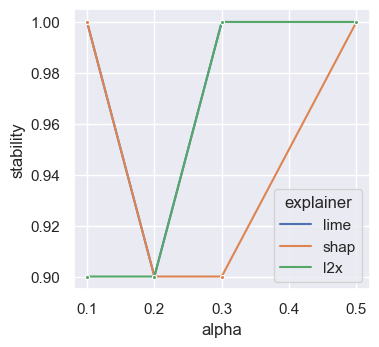

In [27]:
# Définissez la première colonne quantitative comme axe des abscisses
plt.figure(figsize=(13, 8))
sns.set(style="darkgrid")

# Créez une seule légende en dehors de la boucle
for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i - 1)
    sns.lineplot(x='alpha', y=df.columns[i], hue='explainer',marker =".", data=df_tmp)
    sns.lineplot(x='alpha', y='score_lamine',marker =".", data=df_tmp)
    
#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()